In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer,make_classification
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import r2_score,roc_curve,roc_auc_score
from sklearn.feature_selection import f_regression,mutual_info_classif,f_classif,chi2,SelectKBest,SequentialFeatureSelector,RFECV

In [35]:
titanic=sns.load_dataset('titanic')
#titanic['age'].fillna(0,inplace=True)
titanic=titanic.drop(columns=['deck','who','alive','embark_town','adult_male'])
titanic.dropna(inplace=True)
X1=titanic.drop(columns='survived')
enc=LabelEncoder()
X1['sex']=enc.fit_transform(titanic['sex'])
X1['embarked']=enc.fit_transform(titanic['embarked'])
X1['alone']=enc.fit_transform(titanic['alone'])
enc=OrdinalEncoder()
X1['class']=enc.fit_transform(titanic[['class']])
y1=titanic['survived']
X1


pclass  sex   age  sibsp  parch     fare  embarked  class  alone
0         3    1  22.0      1      0   7.2500         2    2.0      0
1         1    0  38.0      1      0  71.2833         0    0.0      0
2         3    0  26.0      0      0   7.9250         2    2.0      1
3         1    0  35.0      1      0  53.1000         2    0.0      0
4         3    1  35.0      0      0   8.0500         2    2.0      1
..      ...  ...   ...    ...    ...      ...       ...    ...    ...
885       3    0  39.0      0      5  29.1250         1    2.0      0
886       2    1  27.0      0      0  13.0000         2    1.0      1
887       1    0  19.0      0      0  30.0000         2    0.0      1
889       1    1  26.0      0      0  30.0000         0    0.0      1
890       3    1  32.0      0      0   7.7500         1    2.0      1

[712 rows x 9 columns]

In [3]:
data=pd.read_csv('kc_house_data.csv')
X=data.drop(columns=['id','date','price'],axis=1)
y=data['price']
X.head()


bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [13]:
org_data=load_breast_cancer(as_frame=True)
data=org_data.frame
data



mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

PCA

<Axes: >

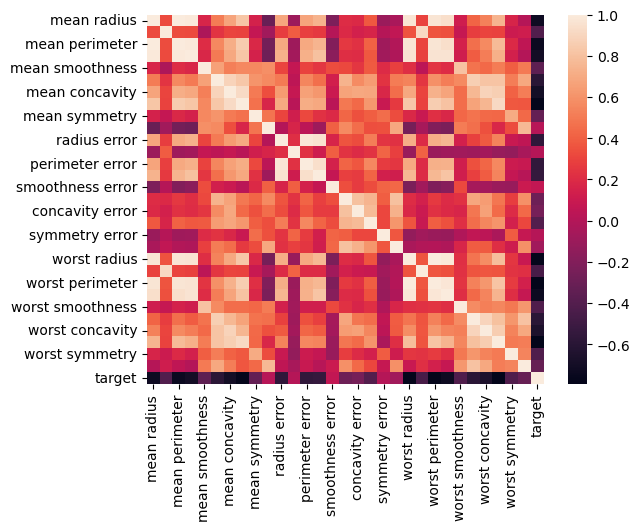

In [14]:
data_mean=data.mean()
data_stddev=data.std()
z=(data-data_mean)/data_stddev

covariance= z.cov()
sns.heatmap(covariance)


In [22]:
eigenvalues,eigenvectors=np.linalg.eig(covariance)

desc=eigenvalues.argsort()[::-1]
eigenvalues=eigenvalues[desc]
eigenvectors=eigenvectors[:,desc]

n_components = np.argmax(eigenvectors >= .50) 
n_components


34

Filter Methods

1)Pearson's Correlation Co-ef


bedrooms  bathrooms  sqft_living  floors  waterfront  view  grade  \
0       3.0       1.00       1180.0     1.0         0.0   0.0    7.0   
1       3.0       2.25       2570.0     2.0         0.0   0.0    7.0   
2       2.0       1.00        770.0     1.0         0.0   0.0    6.0   
3       4.0       3.00       1960.0     1.0         0.0   0.0    7.0   
4       3.0       2.00       1680.0     1.0         0.0   0.0    8.0   

   sqft_above  sqft_basement  yr_renovated      lat  sqft_living15  
0      1180.0            0.0           0.0  47.5112         1340.0  
1      2170.0          400.0        1991.0  47.7210         1690.0  
2       770.0            0.0           0.0  47.7379         2720.0  
3      1050.0          910.0           0.0  47.5208         1360.0  
4      1680.0            0.0           0.0  47.6168         1800.0

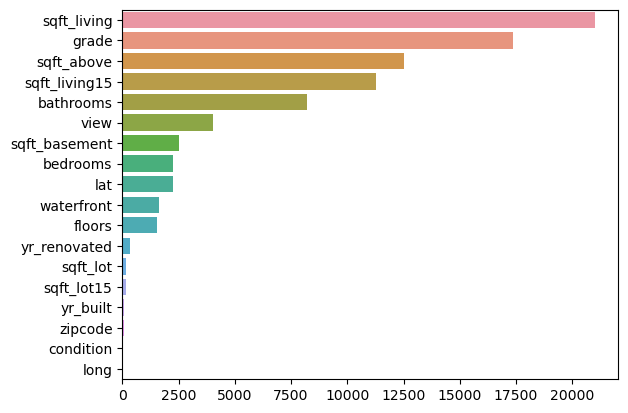

In [130]:
skb=SelectKBest(score_func=f_regression,k=12)
data_selected=skb.fit(X,y)
data_selected_columns=X.columns[data_selected.get_support()]
data_selected=skb.transform(X)
data_selected=pd.DataFrame(data_selected)
data_selected.columns=data_selected_columns

f,p=f_regression(X,y)
f=pd.Series(f)
f.index=X.columns
f=f.sort_values()
sns.barplot(x=f,y=f.index)
data_selected.head()


2)ANOVA

In [136]:
skb=SelectKBest(score_func=f_classif,k=5)
data_selected=skb.fit(X1,y1)
data_selected_columns=X1.columns[data_selected.get_support()]
data_selected=skb.transform(X1)
data_selected=pd.DataFrame(data_selected)
data_selected.columns=data_selected_columns

f,p=f_classif(X1,y1)
f=pd.Series(f)
f.index=X1.columns

sns.barplot(x=f,y=f.index)
data_selected.head()


pclass  sex     fare  class  alone
0     3.0  1.0   7.2500    2.0    0.0
1     1.0  0.0  71.2833    0.0    0.0
2     3.0  0.0   7.9250    2.0    1.0
3     1.0  0.0  53.1000    0.0    0.0
4     3.0  1.0   8.0500    2.0    1.0

3)Chi-Sqaure

pclass  sex   age  class  alone
0     3.0  1.0  22.0    2.0    0.0
1     1.0  0.0  38.0    0.0    0.0
2     3.0  0.0  26.0    2.0    1.0
3     1.0  0.0  35.0    0.0    0.0
4     3.0  1.0  35.0    2.0    1.0

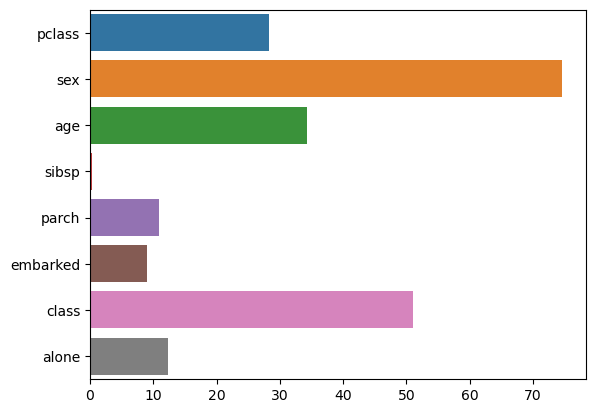

In [132]:

skb=SelectKBest(score_func=chi2,k=5)
K=X1.drop(columns='fare')
data_selected=skb.fit(K,y1)
data_selected_columns=K.columns[data_selected.get_support()]
data_selected=skb.transform(K)
data_selected=pd.DataFrame(data_selected)
data_selected.columns=data_selected_columns

f,p=chi2(K,y1)
f=pd.Series(f)
f.index=K.columns

sns.barplot(x=f,y=f.index)
data_selected.head()


4)Mutual Info

sex  parch     fare  class  alone
0  1.0    0.0   7.2500    2.0    0.0
1  0.0    0.0  71.2833    0.0    0.0
2  0.0    0.0   7.9250    2.0    1.0
3  0.0    0.0  53.1000    0.0    0.0
4  1.0    0.0   8.0500    2.0    1.0

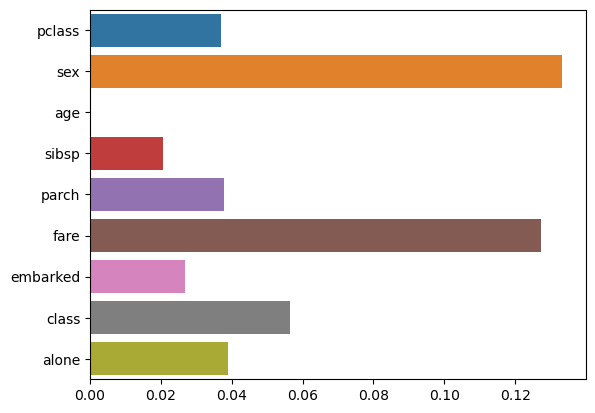

In [128]:
skb=SelectKBest(score_func=mutual_info_classif,k=5)
data_selected=skb.fit_transform(X1,y1)
data_selected=pd.DataFrame(data_selected)
data_selected.columns=skb.get_feature_names_out()

sns.barplot(x=skb.scores_,y=X1.columns)
data_selected.head()

Wrapper methods


1)Forward Selection

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [17]:
sfs=SequentialFeatureSelector(
    estimator=RandomForestRegressor(n_estimators=12,n_jobs=4),
    n_features_to_select=12,
    direction='forward',
    cv=2,
    scoring='r2',
    n_jobs=4
)
sfs.fit(X_train,y_train)

SequentialFeatureSelector(cv=2,
                          estimator=RandomForestRegressor(n_estimators=12,
                                                          n_jobs=4),
                          n_features_to_select=12, n_jobs=4, scoring='r2')

In [19]:
selected_feat=sfs.get_feature_names_out()
selected_feat

array(['bedrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'], dtype=object)

In [30]:
def performance(X_train,X_test,y_train,y_test):
    rf=RandomForestRegressor(n_estimators=200,max_depth=4)
    rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    print("R2-Score:{}".format(r2_score(y_test,pred)))
    

In [31]:
performance(X_train[selected_feat],X_test[selected_feat],y_train,y_test)
performance(X_train,X_test,y_train,y_test)

R2-Score:0.7275924034327769
R2-Score:0.7249153997793653


2)Backward Selection

In [36]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,train_size=0.7)


In [40]:
sfs=SequentialFeatureSelector(
    estimator=RandomForestClassifier(n_estimators=10,n_jobs=4),
    n_features_to_select=6,
    direction='backward',
    scoring='roc_auc',
    cv=2,
    n_jobs=4
)
sfs.fit(X1_train,y1_train)

SequentialFeatureSelector(cv=2, direction='backward',
                          estimator=RandomForestClassifier(n_estimators=10,
                                                           n_jobs=4),
                          n_features_to_select=6, n_jobs=4, scoring='roc_auc')

In [103]:
selected_feat=sfs.get_feature_names_out()
selected_feat


array(['sex', 'age', 'parch', 'fare', 'class', 'alone'], dtype=object)

In [114]:
def class_performance(X_train,X_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators=200,max_depth=4)
    rf.fit(X_train,y_train)
    pred=rf.predict_proba(X_test)
    fpr,tpr,thres=roc_curve(y_test,pred[:,1])
    print("ROC_AUC score:{}".format(roc_auc_score(y_test,pred[:,1])))
    return fpr,tpr,thres
    

In [115]:
t,f,thr=class_performance(X1_train[selected_feat],X1_test[selected_feat],y1_train,y1_test)
t1,f1,thr1=class_performance(X1_train,X1_test,y1_train,y1_test)
sns.lineplot(x=t,y=f)
sns.lineplot(x=t1,y=f1)

ROC_AUC score:0.8292725988700564
ROC_AUC score:0.8415872175141242


<Axes: >

3)Recursive Selction

In [120]:
rfe=RFECV(
    estimator=RandomForestRegressor(n_estimators=12,n_jobs=4),
    min_features_to_select=12,
    cv=2,
    n_jobs=4
)
rfe.fit(X_train,y_train)

RFECV(cv=2, estimator=RandomForestRegressor(n_estimators=12, n_jobs=4),
      min_features_to_select=12, n_jobs=4)

In [122]:
selected_feat=rfe.get_feature_names_out()
selected_feat

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [123]:
performance(X_train[selected_feat],X_test[selected_feat],y_train,y_test)
performance(X_train,X_test,y_train,y_test)

R2-Score:0.7288856471029137
R2-Score:0.724611770118587
